<h2>Exploratory Data Analysis Notebook</h2>
<br>
Let's begin by importing the necessary libraries and modules.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import os

We set a few figure parameters for the <i>matplotlib</i> plots.

In [ ]:
plt.rcParams.update({'figure.figsize': (10.0, 30.0)})
plt.rcParams.update({'font.size': 14})

We download the necessary files from <i>Google Drive.</i>
<br>
<br>
The local directory is not utilised since this notebook was created on <i>Google Colaboratory</i> and hence, having the data on the clould and downloading them whenever required was the better option.

In [ ]:
!gdown https://drive.google.com/uc?id=1oCIVZbIWmg2RvcCHcxko5alyZh19nGoF
!gdown https://drive.google.com/uc?id=1vCS6gDbsS3mVE5WLHM0nu-ww0GcI1ybN
!gdown https://drive.google.com/uc?id=10_pO2fGiAKSdNjO-p3d1dFo3VuY1juL5
!gdown https://drive.google.com/uc?id=1kSH1dteCOdFT5eFFM-1DCdbl7TZ4gXzS
!gdown https://drive.google.com/uc?id=1nRKTC6Pez1fRAMYkFIHQNLfB0Hhj5fok
!gdown https://drive.google.com/uc?id=1lA19-bvYJ_btc1WSXpKqU9L6nD3dpUjR
!gdown https://drive.google.com/uc?id=1Av_X9N5BB38edPLK0vtYIBQ9toUdDB1e
!gdown https://drive.google.com/uc?id=11u-MTRj8qiqC0rsB23F37lc4MjNh3Fhk

Downloading...
From: https://drive.google.com/uc?id=1oCIVZbIWmg2RvcCHcxko5alyZh19nGoF
To: /content/Monday-WorkingHours.pcap_ISCX.csv
177MB [00:02, 85.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vCS6gDbsS3mVE5WLHM0nu-ww0GcI1ybN
To: /content/Tuesday-WorkingHours.pcap_ISCX.csv
135MB [00:01, 90.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=10_pO2fGiAKSdNjO-p3d1dFo3VuY1juL5
To: /content/Wednesday-workingHours.pcap_ISCX.csv
225MB [00:02, 109MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1kSH1dteCOdFT5eFFM-1DCdbl7TZ4gXzS
To: /content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
52.0MB [00:00, 101MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1nRKTC6Pez1fRAMYkFIHQNLfB0Hhj5fok
To: /content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
83.1MB [00:00, 89.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lA19-bvYJ_btc1WSXpKqU9L6nD3dpUjR
To: /content/Friday-WorkingHours-Morning.pcap_ISCX.csv
58.3MB [00:00, 103MB/

We now have all the datasets <i>(Monday to Friday)</i> in our pressent working directory.
<br>
<br>
Since this is the initial stage of the EDA process, let us examine a random dataset.

In [ ]:
df = pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,12048.192770,166.0000,0.000000e+00,166,166,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,6024.096386,6024.096386,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,36144.578310,41.5000,1.060660e+01,49,34,0,0.0000,0.000,0,0,49,49.0,0.0,49,49,0,0,0,0,32,64,12048.192770,24096.385540,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,2,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,960.509070,20.010606,99947.0000,0.000000e+00,99947,99947,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,40,40,10.005303,10.005303,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,40,0,0,0,0,0,0,1,48,1,48,-1,-1,0,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,2593.403031,54.029230,37017.0000,0.000000e+00,37017,37017,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,27.014615,27.014615,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,32,0,0,0,0,0,0,1,48,1,48,-1,-1,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,1.322402,761379.0137,2.539814e+06,13600000,0,111000000,761379.0137,2539814.273,13600000,0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.322402,0.000000,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,147,0,0,0,-1,-1,0,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


Let's get into the <i>schema</i> of the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288602 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             288602 non-null  int64  
 1    Flow Duration                288602 non-null  int64  
 2    Total Fwd Packets            288602 non-null  int64  
 3    Total Backward Packets       288602 non-null  int64  
 4   Total Length of Fwd Packets   288602 non-null  int64  
 5    Total Length of Bwd Packets  288602 non-null  int64  
 6    Fwd Packet Length Max        288602 non-null  int64  
 7    Fwd Packet Length Min        288602 non-null  int64  
 8    Fwd Packet Length Mean       288602 non-null  float64
 9    Fwd Packet Length Std        288602 non-null  float64
 10  Bwd Packet Length Max         288602 non-null  int64  
 11   Bwd Packet Length Min        288602 non-null  int64  
 12   Bwd Packet Length Mean       288602 non-nul

We notice that for every few columns, the column names have an <i>extra " "</i> in the beginning.<br>
Thus, let's add it to our checklist that we should rectify this.<br>
<br>
Let's now move on with the statistics of the data.

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,288602.000000,2.886020e+05,288602.000000,288602.000000,2.886020e+05,2.886020e+05,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,2.885840e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,288602.000000,288602.0,288602.000000,288602.0,288602.000000,2.886020e+05,2.886020e+05,2.886020e+05,288602.000000,288602.000000,288602.000000,288602.000000,2.886020e+05,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.000000,288602.0,288602.0,288602.0,288602.0,288602.0,288602.0,288602.000000,2.886020e+05,288602.000000,2.886020e+05,288602.000000,288602.000000,288602.000000,288602.000000,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05,2.886020e+05
mean,8192.051115,8.974451e+06,6.229749,6.221596,5.662162e+02,6.162179e+03,140.848750,17.164105,41.673154,40.731899,325.969695,40.423188,133.065934,101.304279,inf,inf,6.027631e+05,1.072000e+06,3.047058e+06,7.451759e+04,8.725641e+06,1.263388e+06,8.494571e+05,2.941413e+06,7.116007e+05,8.223540e+06,1.245943e+06,6.619727e+05,2.571951e+06,7.598954e+05,0.036213,0.0,0.001091,0.0,162.484040,1.605226e+02,9.321699e+04,9.210731e+03,16.641132,362.783591,85.546570,107.554263,6.407230e+04,0.017256,0.036213,0.000270,0.406601,0.229115,0.085429,0.001091,0.000270,0.645318,96.936418,41.673154,133.065934,162.484040,0.0,0.0,0.0,0.0,0.0,0.0,6.229749,5.661134e+02,6.221596,6.162009e+03,5589.631212,1589.864855,3.435766,25.686859,6.137151e+04,4.154108e+04,1.325129e+05,3.810446e+04,2.609290e+06,1.210422e+05,2.701024e+06,2.484257e+06
std,17516.899862,2.753682e+07,74.587817,111.399547,2.605350e+04,1.897400e+05,435.712526,31.974350,118.941415,137.715423,757.749073,63.634968,270.640831,255.615376,NaN,NaN,3.221968e+06,4.639822e+06,1.129153e+07,2.003467e+06,2.739114e+07,7.455269e+06,3.188037e+06,1.126593e+07,7.227966e+06,2.667838e+07,7.588856e+06,2.923059e+06,1.076538e+07,7.346018e+06,0.186819,0.0,0.033019,0.0,2094.132799,3.119155e+03,2.881730e+05,4.121019e+04,22.764150,825.925261,173.851281,229.139064,2.084604e+05,0.130223,0.186819,0.016438,0.491200,0.420264,0.279520,0.033019,0.016438,0.686549,181.253543,118.941415,270.640831,2094.132799,0.0,0.0,0.0,0.0,0.0,0.0,74.587817,2.600262e+04,111.399547,1.897090e+05,13016.620266,7864.710940,49.746169,5.853203,5.195102e+05,3.778600e+05,9.265051e+05,4.408003e+05,1.068591e+07,1.637034e+06,1.099278e+07,1.051758e+07
min,0.000000,-2.000000

We notice that two columns <i>(Flow Bytes/s and Flow Packets/s)</i> have <i>NULL</i> and <i>INF</i> values in them.<br>
Let's add this to our checklist as well.<br>
<br>
Hence, our checklist contains of two tasks:
- Rectify column names
- Remove invalid data
<br>
<br>
Let's start with them

In [ ]:
cols = list(df.columns)

for col in cols:
  if col[0] == ' ':
    df = df.rename(columns={col: col[1:]})
cols = list(df.columns)

Since the number of NULL and INF records are very few, we can go ahead and delete the records since they may not amount to much of a difference.

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

Now that we have a fairly clean dataframe, we can go ahead with further analytics.<br>
<br>
Let's start with understanding by what magnitude each feature is relevant to the infiltration attacks.<br>
There are several ways to do this:
- Correlation Matrix
- Gini Importance
- Permutation based Feature Importance
- SHAP (SHapley Additive exPlanations)
<br>
<br>
Let's go ahead with the classic Gini Importance using Random Forest Regression.

In [ ]:
X = df[cols[:-1]]
y = df['Label']

We use <i>Label Encoder</i> to convert our String labels to integers to enable training the Regressor. (Machines only understand numbers)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Now that our Regressor is ready, let's plot the importance bar graph in descending order of importance.

Text(0.5, 1.0, 'Feature Importances plot')

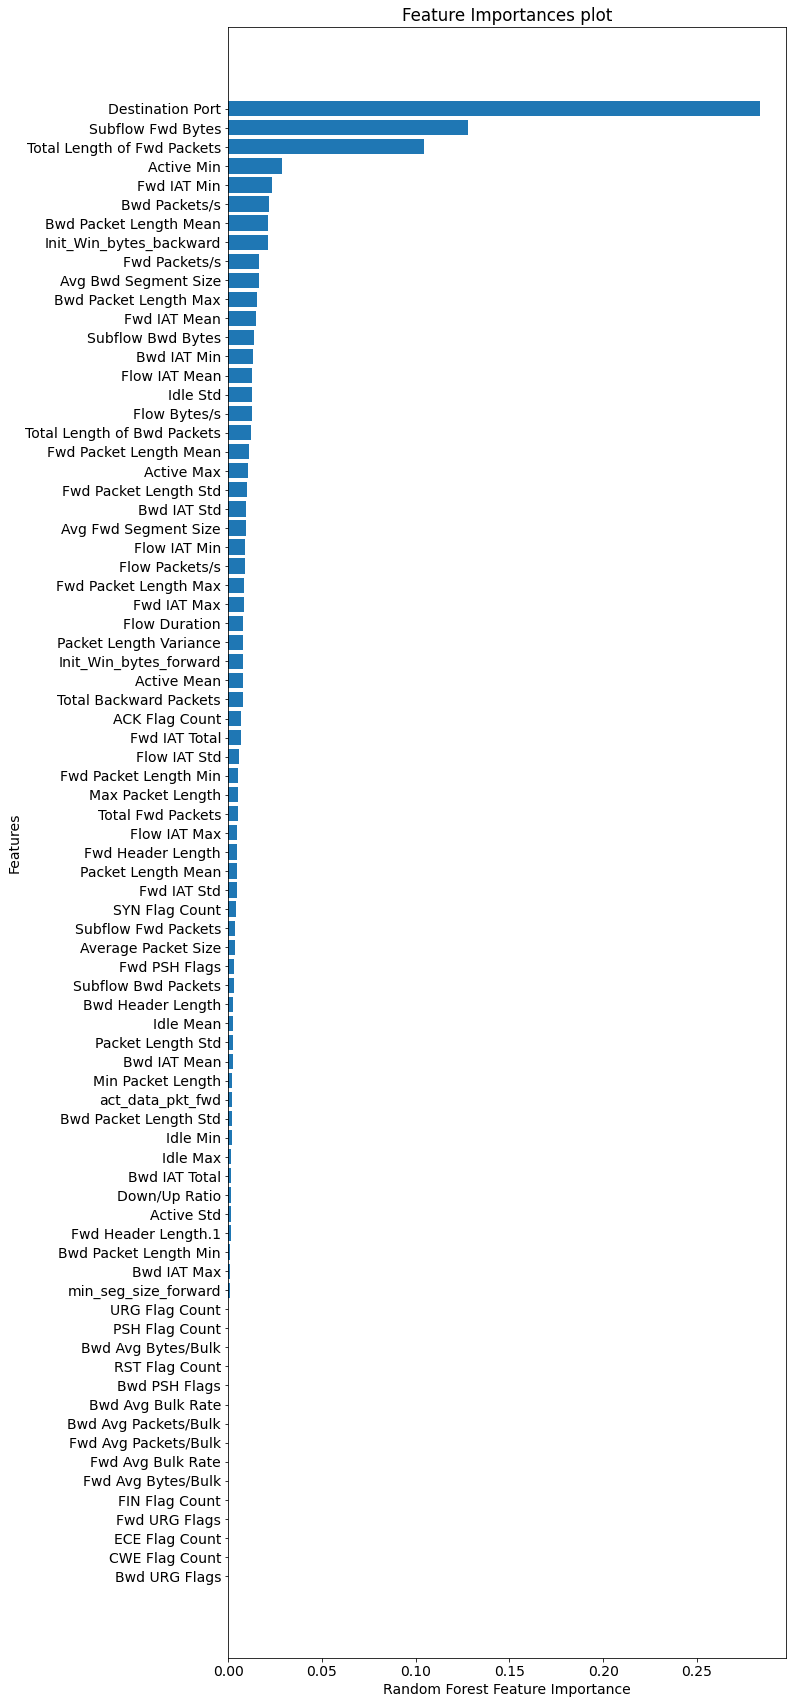

In [ ]:
feature_names = cols[: -1]

sorted_idx = rf.feature_importances_.argsort()
plt.barh(np.array(feature_names)[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances plot")

With this plot, we obtain insights about how each column affects the malware detection process.<br>
The few most important features are:
- Destination Port
- Subflow Fwd Bytes
- Total Length of Fwd Packets

These results are extremely similar to the ones produced by the researchers in the research article.<br>
<br>
Similarly, this process can be utilized to obtain the important features for individual malware categories <i>(the results of which are stated in the article)</i>.<br>
<br>
Let's move ahead by simply merging all the datasets to create one master dataframe.

In [ ]:
datasets = os.listdir()
datasets.remove('.config')
datasets.remove('sample_data')
datasets

['Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv']

In [ ]:
df = pd.read_csv(datasets[0])

for i in range(1, len(datasets)):
  df_inter = pd.read_csv(datasets[i])
  df = pd.concat([df, df_inter], axis=0)
  
cols = list(df.columns)
df = df.sample(frac = 1)

Let's perform similar analysis as done earlier.

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
345256,80,61,2,0,12,0,6,6,6.0,0.000000,0,0,0.0,0.000000,1.967213e+05,32786.885250,6.100000e+01,0.000000e+00,61,61,61,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0,0,0,40,0,32786.885250,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,16425,-1,1,20,0.0,0.0000,0,0,0.0,0.0,0,0,BENIGN
314427,53,217,2,2,138,394,69,69,69.0,0.000000,197,197,197.0,0.000000,2.451613e+06,18433.179720,7.233333e+01,8.251263e+01,164,4,4,4.0,0.0,4,4,49,49.0,0.0,49,49,0,0,0,0,40,40,9216.589862,9216.589862,69,197,120.200000,70.108487,4915.200000,0,0,0,0,0,0,0,0,1,150.250000,69.0,197.0,40,0,0,0,0,0,0,2,138,2,394,-1,-1,1,20,0.0,0.0000,0,0,0.0,0.0,0,0,BENIGN
87180,53,54827,1,1,39,317,39,39,39.0,0.000000,317,317,317.0,0.000000,6.493151e+03,36.478377,5.482700e+04,0.000000e+00,54827,54827,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,18.239189,18.239189,39,317,131.666667,160.503375,25761.333330,0,0,0,0,0,0,0,0,1,197.500000,39.0,317.0,20,0,0,0,0,0,0,1,39,1,317,-1,-1,0,20,0.0,0.0000,0,0,0.0,0.0,0,0,BENIGN
282047,53,254,2,2,74,186,37,37,37.0,0.000000,93,93,93.0,0.000000,1.023622e+06,15748.031500,8.466667e+01,6.264450e+01,157,48,49,49.0,0.0,49,49,48,48.0,0.0,48,48,0,0,0,0,52,64,7874.015748,7874.015748,37,93,59.400000,30.672463,940.800000,0,0,0,0,0,0,0,0,1,74.250000,37.0,93.0,52,0,0,0,0,0,0,2,74,2,186,-1,-1,1,20,0.0,0.0000,0,0,0.0,0.0,0,0,BENIGN
45801,53,101744051,3,3,177,405,75,50,59.0,13.892444,146,129,135.0,9.539392,5.720236e+00,0.058972,2.030000e+07,3.320000e+07,76800000,121443,102000000,50800000.0,37000000.0,77000000,24700000,101000000,50600000.0,37300000.0,77000000,24300000,0,0,0,0,84,96,0.029486,0.029486,50,146,90.285714,43.060865,1854.238095,0,0,0,0,0,0,0,0,1,105.333333,59.0,135.0,84,0,0,0,0,0,0,3,177,3,405,-1,-1,2,20,304382.0,258714.8149,487321,121443,50500000.0,37200000.0,76800000,24200000,BENIGN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 345256 to 15493
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max      

In [ ]:
cols = list(df.columns)

for col in cols:
  if col[0] == ' ':
    df = df.rename(columns={col: col[1:]})
cols = list(df.columns)

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

Let's now look at the number of unique values in each column.

In [ ]:
print(df.nunique())
print()
for col in df:
    if(df[col].nunique()<20):
        print(col, ": ",df[col].unique())

Destination Port                 53805
Flow Duration                  1050899
Total Fwd Packets                 1432
Total Backward Packets            1747
Total Length of Fwd Packets      17928
                                ...   
Idle Mean                       222016
Idle Std                        197616
Idle Max                        149737
Idle Min                        223888
Label                               13
Length: 79, dtype: int64

Fwd PSH Flags :  [0 1]
Bwd PSH Flags :  [0]
Fwd URG Flags :  [0 1]
Bwd URG Flags :  [0]
FIN Flag Count :  [0 1]
SYN Flag Count :  [0 1]
RST Flag Count :  [0 1]
PSH Flag Count :  [0 1]
ACK Flag Count :  [1 0]
URG Flag Count :  [0 1]
CWE Flag Count :  [0 1]
ECE Flag Count :  [0 1]
Fwd Avg Bytes/Bulk :  [0]
Fwd Avg Packets/Bulk :  [0]
Fwd Avg Bulk Rate :  [0]
Bwd Avg Bytes/Bulk :  [0]
Bwd Avg Packets/Bulk :  [0]
Bwd Avg Bulk Rate :  [0]
Label :  ['BENIGN' 'DDoS' 'DoS Hulk' 'PortScan' 'DoS Slowhttptest' 'DoS GoldenEye'
 'Web' 'DoS slowloris' '

We notice that the <i>Label</i> column various <i>Web</i> attacks stated.<br>
But, they work in similar ways (according to the dataset) and hence, grouping them as 'Web' would be a good idea.

In [ ]:
df.iloc[:,-1] = df.iloc[:, -1].apply(lambda x : 'Web' if x[:3] == 'Web' or x[:3] == 'Sql' else x)
df.iloc[:, -1].value_counts()

BENIGN              2273097
DoS Hulk             231073
PortScan             158930
DDoS                 128027
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Web                    2180
Bot                    1966
Infiltration             36
Heartbleed               11
Name: Label, dtype: int64

We have an idea of how our data looks like. Hence, the EDA process is complete.<br>
Let's move ahead with the ETL process now.